In [1]:
import pandas as pd
from pymongo import MongoClient

import matplotlib.pyplot as plt
import seaborn as sns
import pylab as py 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import boxcox

Connect to MongoDB

In [2]:
client = MongoClient('localhost', 27017)
db = client['GithubRepo']
print(db.list_collection_names())
Timezone_Record = db['Timezone_Record']

['JavaScript_top500', 'Commit_Record', 'reposInfo', 'Documentation_Record', 'CodeQuality_Record', 'Timezone_Record', 'JavaScript_60']


In [3]:
df = pd.DataFrame(list(Timezone_Record.find()))

# drop the _id column
df = df.drop(['_id'], axis=1)

print(df.columns)

Index(['name', 'owner', 'url', 'popularity', 'popular_level',
       'committer_timezones', 'author_timezones', 'committer_timezone_count',
       'author_timezone_count', 'languages', 'languages_count', 'repo_age',
       'repo_size', 'team_size'],
      dtype='object')


In [4]:
df.shape

(120, 14)

In [5]:
df.head(5)

,name,owner,url,popularity,popular_level,committer_timezones,author_timezones,committer_timezone_count,author_timezone_count,languages,languages_count,repo_age,repo_size,team_size
0,ember.js,emberjs,https://github.com/emberjs/ember.js,105458627,high,"[{'timezone': -36000, 'count': 34}, {'timezone...","[{'timezone': 25200, 'count': 5282}, {'timezon...",26,26,"[JavaScript, HTML, TypeScript, Handlebars]",4,4635,96853,30
1,cesium,CesiumGS,https://github.com/CesiumGS/cesium,36823334,high,"[{'timezone': -14400, 'count': 2}, {'timezone'...","[{'timezone': -36000, 'count': 402}, {'timezon...",17,17,"[CSS, JavaScript, HTML, GLSL, TypeScript, Hand...",8,4353,804770,18
2,meteor,meteor,https://github.com/meteor/meteor,14179484,high,"[{'timezone': -36000, 'count': 297}, {'timezon...","[{'timezone': -36000, 'count': 319}, {'timezon...",22,22,"[HTML, JavaScript, CSS, Shell, CoffeeScript, P...",10,4396,161047,14
3,BGOONZ_BLOG_2.0,bgoonz,https://github.com/bgoonz/BGOONZ_BLOG_2.0,9132557,high,"[{'timezone': 18000, 'count': 956}, {'timezone...","[{'timezone': -19800, 'count': 1}, {'timezone'...",5,5,"[JavaScript, Makefile, Shell, CSS, SCSS]",5,995,2618011,3
4,travis-web,travis-ci,https://github.com/travis-ci/travis-web,6569915,high,"[{'timezone': -32400, 'count': 24}, {'timezone...","[{'timezone': -32400, 'count': 24}, {'timezone...",23,23,"[Ruby, HTML, JavaScript, Shell, Dockerfile, Ma...",9,4246,148464,15


In [6]:
df.tail(5)

,name,owner,url,popularity,popular_level,committer_timezones,author_timezones,committer_timezone_count,author_timezone_count,languages,languages_count,repo_age,repo_size,team_size
115,the-t-list,teamtant,https://github.com/teamtant/the-t-list,108,low,"[{'timezone': 18000, 'count': 4}, {'timezone':...","[{'timezone': 18000, 'count': 4}, {'timezone':...",3,3,"[JavaScript, HTML, SCSS]",3,650,19501,4
116,ns-chat,mococa,https://github.com/mococa/ns-chat,107,low,"[{'timezone': 0, 'count': 21}, {'timezone': -3...","[{'timezone': 0, 'count': 21}, {'timezone': -3...",3,3,"[JavaScript, SCSS]",2,680,1818,1
117,pokedex,woliveiras,https://github.com/woliveiras/pokedex,106,low,"[{'timezone': -3600, 'count': 1}, {'timezone':...","[{'timezone': -3600, 'count': 1}, {'timezone':...",2,2,"[HTML, CSS, JavaScript]",3,2095,1952,1
118,hexapod,mithi,https://github.com/mithi/hexapod,12705,high,"[{'timezone': 0, 'count': 13}, {'timezone': -2...","[{'timezone': -7200, 'count': 8}, {'timezone':...",2,2,"[HTML, JavaScript, CSS, Shell]",4,1352,6457,2
119,twitter-bot,mihailgaberov,https://github.com/mihailgaberov/twitter-bot,173,low,"[{'timezone': 0, 'count': 10}, {'timezone': -7...","[{'timezone': 0, 'count': 10}, {'timezone': -7...",3,3,[JavaScript],1,2127,1116,1


Descriptive Analysis

In [7]:
# seperate df into popular_df and unpopular_df
# use popular_level to seperate
js_popular_df = df[df['popular_level'] == 'high']
js_unpopular_df = df[df['popular_level'] == 'low']

print(js_popular_df.shape)
print(js_unpopular_df.shape)

(60, 14)
(60, 14)


In [8]:
js_popular_df['committer_timezone_count'].describe()

count    60.000000
mean      8.066667
std       6.278472
min       1.000000
25%       3.000000
50%       5.500000
75%      11.500000
max      26.000000
Name: committer_timezone_count, dtype: float64

In [9]:
js_unpopular_df['committer_timezone_count'].describe()

count    60.000000
mean      2.050000
std       1.779592
min       1.000000
25%       1.000000
50%       1.000000
75%       3.000000
max      10.000000
Name: committer_timezone_count, dtype: float64

In [10]:
js_popular_df['languages_count'].describe()

count    60.000000
mean      4.400000
std       2.675691
min       1.000000
25%       2.000000
50%       4.000000
75%       6.000000
max      10.000000
Name: languages_count, dtype: float64

In [11]:
js_unpopular_df['languages_count'].describe()

count    60.000000
mean      2.850000
std       0.879619
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: languages_count, dtype: float64

Collinearity

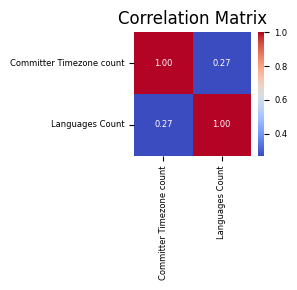

In [12]:
df_corr = df[['committer_timezone_count', 'languages_count']].corr(method='spearman')

# Create a figure without subplots
fig, ax = plt.subplots(1, 1, figsize=(3, 3))

# Use seaborn's heatmap function to plot the correlation matrix
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm', square=False, ax=ax, annot_kws={"size": 6})

# Set the title of the heatmap
custom_labels = ['Committer Timezone count', 'Languages Count']
ax.set_title('Correlation Matrix')
ax.set_xticklabels(custom_labels, rotation=90, fontsize=6)
ax.set_yticklabels(custom_labels, rotation=0, fontsize=6)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=6)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Variance Inflation Factor (VIF)

In [13]:
X = df[['committer_timezone_count', 'languages_count', 'repo_age', 'repo_size', 'team_size']]

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,committer_timezone_count,5.091136
1,languages_count,3.131976
2,repo_age,5.791029
3,repo_size,1.166172
4,team_size,1.891998


Multivariate Linear Model

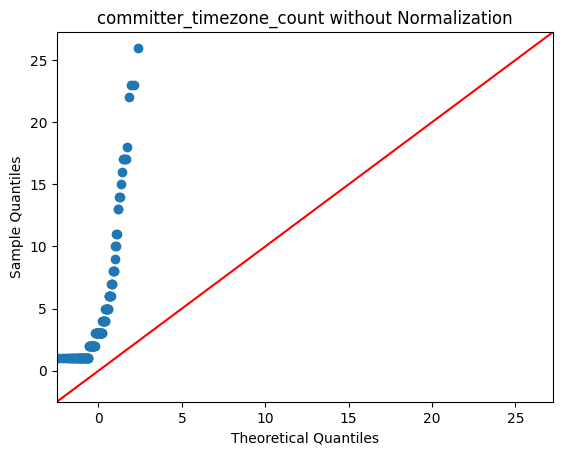

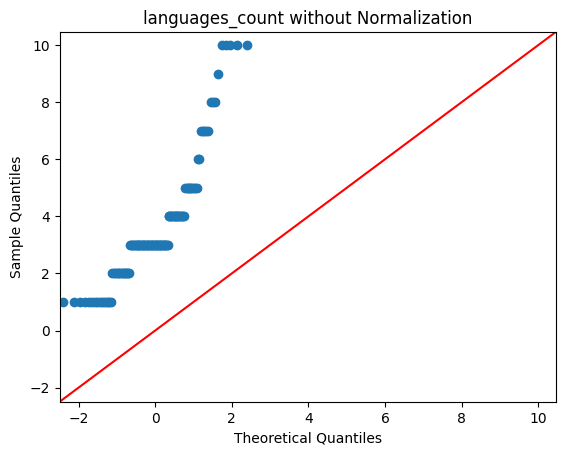

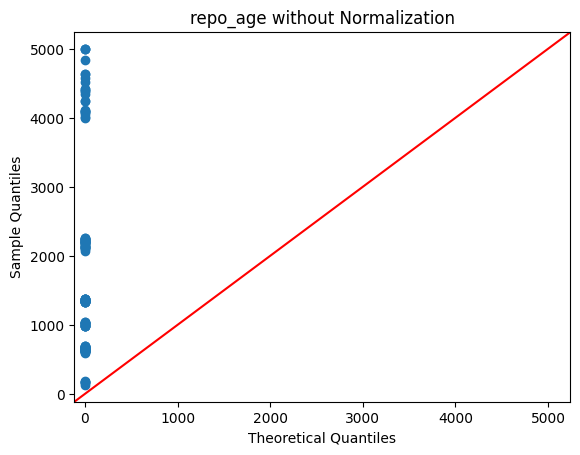

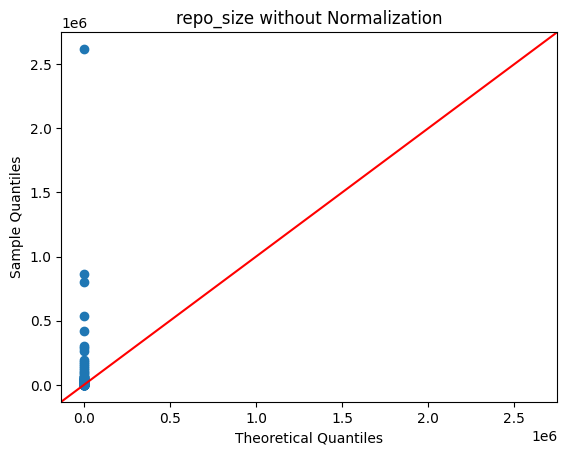

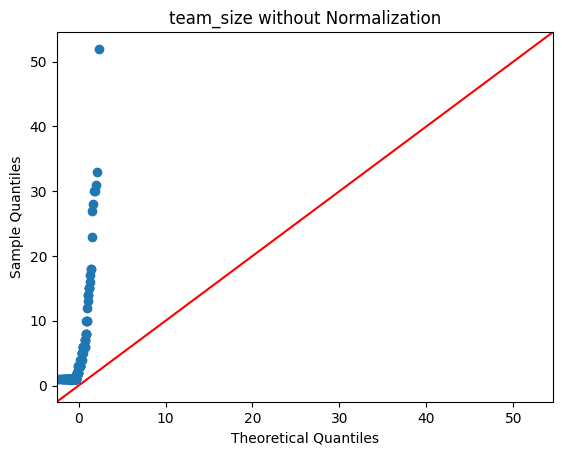

In [14]:
for column in ['committer_timezone_count', 'languages_count', 'repo_age', 'repo_size', 'team_size']:
    sm.qqplot(df[column], line ='45')
    py.title(f"{column} without Normalization")
    py.show()

Box-Cox Transformation

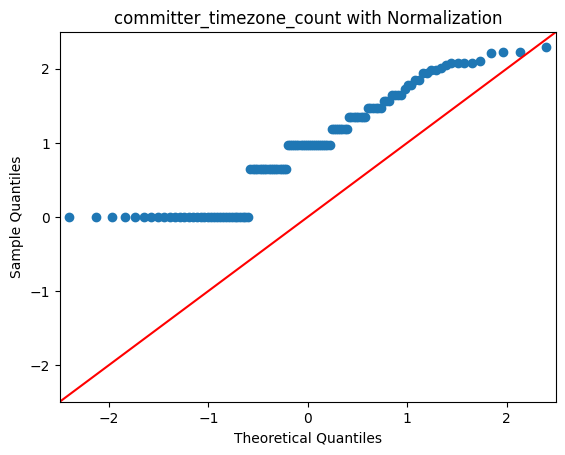

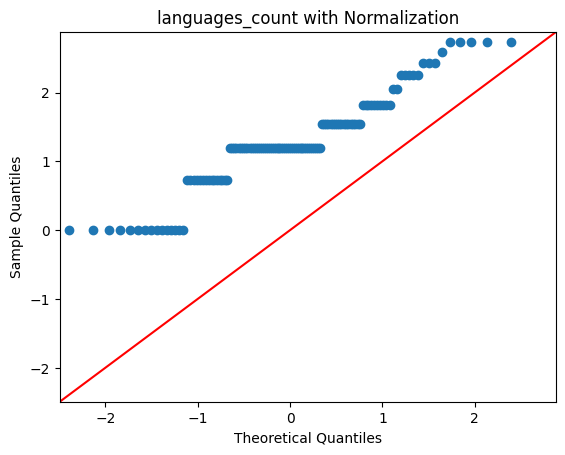

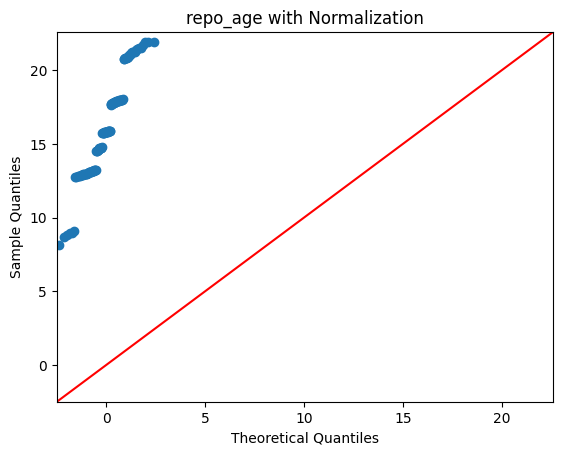

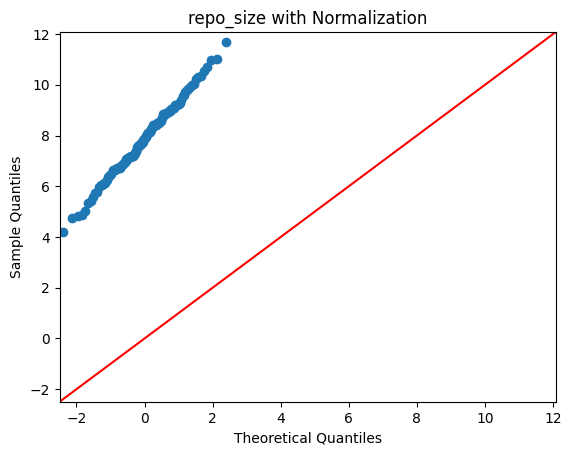

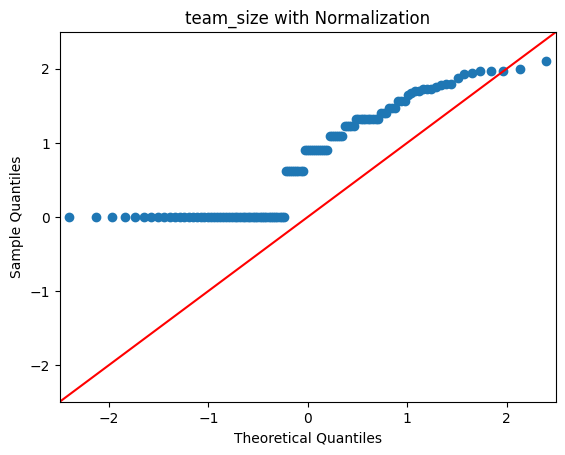

In [15]:
df['repo_age'], _ = boxcox(df['repo_age'])
df['repo_size'], _ = boxcox(df['repo_size'])
df['team_size'], _ = boxcox(df['team_size'])

df['committer_timezone_count'], _ = boxcox(df['committer_timezone_count'])
df['languages_count'], _ = boxcox(df['languages_count'])

for column in ['committer_timezone_count', 'languages_count', 'repo_age', 'repo_size', 'team_size']:
    sm.qqplot(df[column], line ='45')
    py.title(f"{column} with Normalization")
    py.show()

Regression Linear Model

OLS

In [16]:
# Define the independent variables and add a constant term (for the intercept)
X = df[['committer_timezone_count', 'languages_count']]
X = sm.add_constant(X)

# Define the dependent variable
y = df['popularity']

# Perform the regression
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     4.283
Date:                Fri, 15 Mar 2024   Prob (F-statistic):             0.0160
Time:                        13:35:56   Log-Likelihood:                -2102.9
No. Observations:                 120   AIC:                             4212.
Df Residuals:                     117   BIC:                             4220.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [17]:
# Define the independent variables and add a constant term (for the intercept)
X = df[['committer_timezone_count', 'languages_count', 'repo_age', 'repo_size', 'team_size']]
X = sm.add_constant(X)

# Define the dependent variable
y = df['popularity']

# Perform the regression
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2.407
Date:                Fri, 15 Mar 2024   Prob (F-statistic):             0.0408
Time:                        13:35:56   Log-Likelihood:                -2101.1
No. Observations:                 120   AIC:                             4214.
Df Residuals:                     114   BIC:                             4231.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

GLM - Negative Binomial

In [18]:
# Define the independent variables and add a constant term (for the intercept)
X = df[['committer_timezone_count', 'languages_count']]
X = sm.add_constant(X)

# Define the dependent variable
y = df['popularity']

# Fit the Negative Binomial Regression model
model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             popularity   No. Observations:                  120
Model:                            GLM   Df Residuals:                      117
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1419.2
Date:                Fri, 15 Mar 2024   Deviance:                       658.30
Time:                        13:35:56   Pearson chi2:                 2.03e+03
No. Iterations:                    15   Pseudo R-squ. (CS):             0.9989
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/opt/homebrew/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Let Developer Size, Project Age, and Repo Size as confounding variable

In [19]:
X = df[['committer_timezone_count', 'languages_count', 'repo_age', 'repo_size', 'team_size']]
X = sm.add_constant(X)

y = df['popularity']

# Fit the Negative Binomial Regression model with the confounder
model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             popularity   No. Observations:                  120
Model:                            GLM   Df Residuals:                      114
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1319.9
Date:                Fri, 15 Mar 2024   Deviance:                       459.83
Time:                        13:35:56   Pearson chi2:                     933.
No. Iterations:                    48   Pseudo R-squ. (CS):             0.9998
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/opt/homebrew/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Residual Analysis - Get Model Fittness

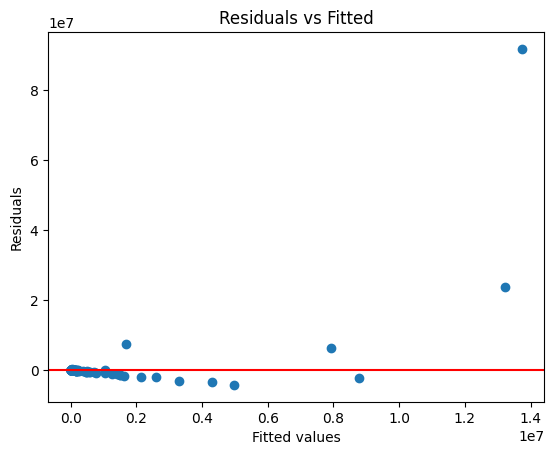

In [20]:
# Get the model's predictions
predictions = model.fittedvalues

# Calculate residuals
residuals = model.resid_response

# Create a scatter plot
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()